In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
bikes=pd.read_csv("/content/bikes.csv")
bikes

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-18,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-18,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-18,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-18,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-18,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-19,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-19,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-19,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-19,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [77]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


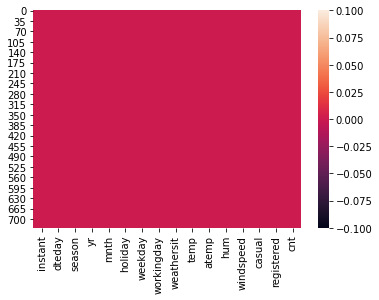

In [78]:
sns.heatmap(bikes.isnull())

No Null values in the Dataset. We can move ahead with cleaning the dataset

In [79]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Almost all dataset are numeric in nature

To have a clear understanding, we need to replace number with seasons in Seasons column



In [80]:
bikes["season"]=bikes["season"].replace([1,2,3,4],["Spring","Summer","Fall","Winter"])
bikes

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-18,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-18,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-18,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-18,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-18,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-19,Spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-19,Spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-19,Spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-19,Spring,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [81]:
bikes=pd.get_dummies(bikes,columns=["season"],prefix="season",prefix_sep="_")
bikes

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_Fall,season_Spring,season_Summer,season_Winter
0,1,01-01-18,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0,0
1,2,02-01-18,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,0,0
2,3,03-01-18,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,0
3,4,04-01-18,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,0
4,5,05-01-18,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-19,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,0,1,0,0
726,727,28-12-19,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,0,1,0,0
727,728,29-12-19,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,0,1,0,0
728,729,30-12-19,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,0,1,0,0


In [82]:
bikes["relative temp"]=bikes["atemp"]-bikes["temp"]
bikes

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_Fall,season_Spring,season_Summer,season_Winter,relative temp
0,1,01-01-18,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0,0,4.070403
1,2,02-01-18,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,0,0,2.784352
2,3,03-01-18,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,0,1.419326
3,4,04-01-18,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,0,2.406100
4,5,05-01-18,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,0,2.158263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-19,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,0,1,0,0,0.911253
726,727,28-12-19,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,0,1,0,0,2.365647
727,728,29-12-19,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,0,1,0,0,1.733347
728,729,30-12-19,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,0,1,0,0,1.095847


3.4070624063013697
3.6594984999999998


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


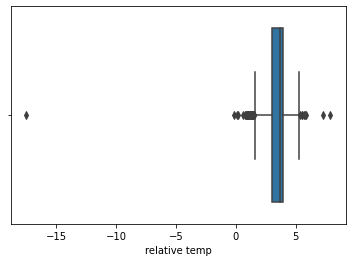

In [83]:
sns.boxplot(bikes["relative temp"])
print(bikes["relative temp"].mean())
print(bikes["relative temp"].median())

the actual temperature in average feels like 3.5 degrees more. so we can eliminate atemp and use temp for model

In [84]:
bikes=bikes.drop(columns=["atemp","relative temp"])
bikes

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,season_Fall,season_Spring,season_Summer,season_Winter
0,1,01-01-18,0,1,0,6,0,2,14.110847,80.5833,10.749882,331,654,985,0,1,0,0
1,2,02-01-18,0,1,0,0,0,2,14.902598,69.6087,16.652113,131,670,801,0,1,0,0
2,3,03-01-18,0,1,0,1,1,1,8.050924,43.7273,16.636703,120,1229,1349,0,1,0,0
3,4,04-01-18,0,1,0,2,1,1,8.200000,59.0435,10.739832,108,1454,1562,0,1,0,0
4,5,05-01-18,0,1,0,3,1,1,9.305237,43.6957,12.522300,82,1518,1600,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-19,1,12,0,4,1,2,10.420847,65.2917,23.458911,247,1867,2114,0,1,0,0
726,727,28-12-19,1,12,0,5,1,2,10.386653,59.0000,10.416557,644,2451,3095,0,1,0,0
727,728,29-12-19,1,12,0,6,0,2,10.386653,75.2917,8.333661,159,1182,1341,0,1,0,0
728,729,30-12-19,1,12,0,0,0,1,10.489153,48.3333,23.500518,364,1432,1796,0,1,0,0


In [85]:
bikes=bikes.drop(columns=["dteday","casual","registered"])
bikes

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,0,1,0,0
1,2,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,0,1,0,0
2,3,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,0,1,0,0
3,4,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,0,1,0,0
4,5,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114,0,1,0,0
726,727,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095,0,1,0,0
727,728,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341,0,1,0,0
728,729,1,12,0,0,0,1,10.489153,48.3333,23.500518,1796,0,1,0,0


In [86]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [87]:
X=bikes.drop(columns=["cnt","instant"])
Y=bikes["cnt"]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     yr  mnth  holiday  ...  season_Spring  season_Summer  season_Winter
676   1    11        0  ...              0              0              1
613   1     9        0  ...              0              0              0
486   1     5        0  ...              0              1              0
408   1     2        0  ...              1              0              0
693   1    11        0  ...              0              0              1
..   ..   ...      ...  ...            ...            ...            ...
71    0     3        0  ...              1              0              0
106   0     4        0  ...              0              1              0
270   0     9        0  ...              0              0              1
435   1     3        0  ...              1              0              0
102   0     4        0  ...              0              1              0

[489 rows x 13 columns]
     yr  mnth  holiday  ...  season_Spring  season_Summer  season_Winter
468   1     4        0  ..

In [89]:
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
bikes_prediction=regr.predict(X_test)

In [91]:
print("Coefficients: \n",regr.coef_)
print("Mean square error: %.2f" % mean_squared_error(y_test,bikes_prediction))
print("Coefficient of determination: %.2f" % r2_score(y_test,bikes_prediction))

Coefficients: 
 [ 1983.72735213   -34.37029928  -560.23340395    59.33447654
   128.81820551  -655.35555412   122.53166526    -9.19584777
   -40.8636723     24.87963762 -1062.60672577   235.63321469
   802.09387346]
Mean square error: 658414.83
Coefficient of determination: 0.82


In [92]:
bikes_2=pd.read_csv("/content/bikes.csv")
bikes_2

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-18,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-18,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-18,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-18,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-18,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-19,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-19,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-19,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-19,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [94]:
X2=bikes_2[["temp","atemp","hum","windspeed"]]
Y2=bikes_2["cnt"]

In [95]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,Y2,test_size=0.3)

In [96]:
regr2=linear_model.LinearRegression()
regr2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
prediction2=regr2.predict(X2_test)

In [98]:
print("Mean squared error: %.2f" % mean_squared_error(y2_test,prediction2))
print("R Squared: %.2f" % r2_score(y2_test,prediction2))

Mean squared error: 2466898.34
R Squared: 0.33


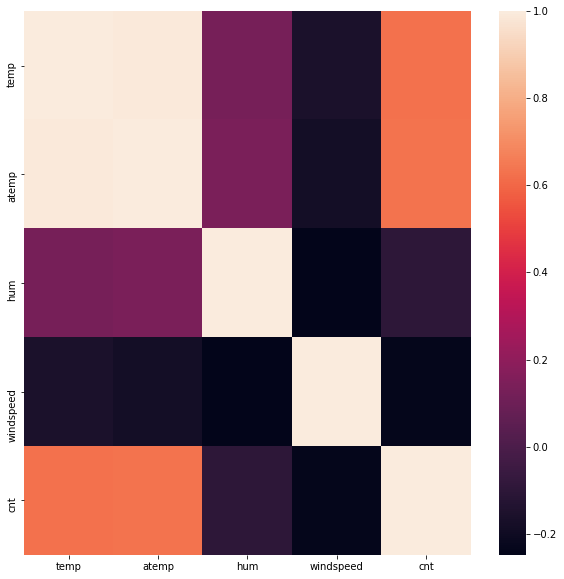

In [99]:
plt.figure(figsize=(10,10))
sns.heatmap(bikes_2[["temp","atemp","hum","windspeed","cnt"]].corr())